# Classification with Logistic Regression and SVM

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll be trying to predict a classification- survival or deceased.

## Import Libraries
Import all necessary libraries


## Name: Akshay Pradeep Patade
## CWID: 20009092

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


## The Data
Read the train dataset in to a pandas dataframe

In [17]:
df = pd.read_csv('titanic_train.csv')

# Exploratory Data Analysis

## Missing Data
Use the heatmap functionality of seaborn to see where we are missing data.

<AxesSubplot:>

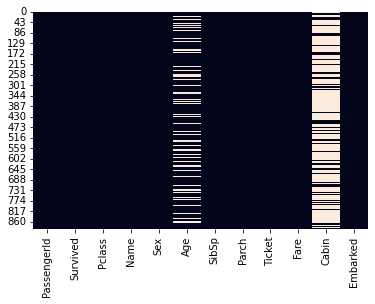

In [18]:
sns.heatmap(df.isnull(),cbar = False)

Create a histogram for the target variable "Survived". You can use the seaborn.countplot function. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

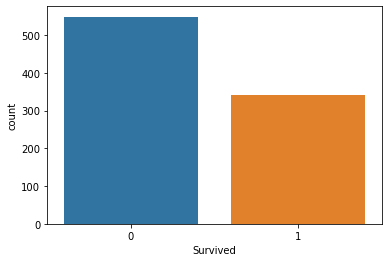

In [19]:
sns.countplot(data = df, x = "Survived")

Create a histogram for the target variable "Survived" for males and females. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

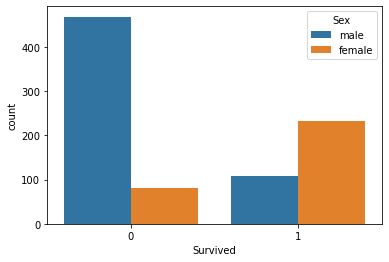

In [20]:
sns.countplot(data = df, x = "Survived", hue = "Sex")

Create a histogram for the  "Pclass" feature.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

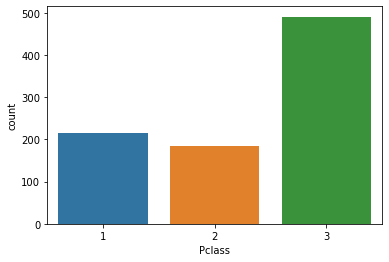

In [21]:
sns.countplot(data = df, x = "Pclass")

## Data Cleaning
Fill in the missing data points with the average age for the age column. Drop the Cabin columna and all the row that have feature Emkarked that is NaN. 

In [22]:
#Filling the missing age values with the average age
df['Age'].fillna(df['Age'].mean(), inplace = True)

#Dropping the Cabin Column. We will also drop the Name and Ticket column because it is not needed in our model
df = df.drop(['Cabin','Name','Ticket'],axis = 1)
print(df.columns)

#Droping the rows for which Embarked Columns is NaN
df = df.dropna(subset = ['Embarked'])

#Checking for the null values
print(df.isnull().sum())



Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


## Converting Categorical Features 

Use pandas.get_dummies() function to convert categorical data

In [23]:
#Get the categorical variables
categories = []
for x in df.columns:
    if(df[x].dtype == 'O'):
        categories.append(x)

print("There are total "+str(len(categories))+ " categorical variables")
print("The categorical variables are: ", categories)

#Here we have 4 categorical variables


df = pd.get_dummies(df, columns = categories)

print(df.head())


There are total 2 categorical variables
The categorical variables are:  ['Sex', 'Embarked']
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  \
0            1         0       3  22.0      1      0   7.2500           0   
1            2         1       1  38.0      1      0  71.2833           1   
2            3         1       3  26.0      0      0   7.9250           1   
3            4         1       1  35.0      1      0  53.1000           1   
4            5         0       3  35.0      0      0   8.0500           0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0         1           0           0           1  
1         0           1           0           0  
2         0           0           0           1  
3         0           0           0           1  
4         1           0           0           1  


# Logistic Regression Model
## Train Test Split

In [24]:
y = df['Survived']
X = df.drop(columns = 'Survived')

#Dividing the data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#Normalizing the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


## Training and Predicting

Train a Logistic Regression model with the training data. 

In [25]:
logreg = LogisticRegression(solver = 'liblinear', random_state = 1)
logreg.fit(X_train, y_train)

y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

#Checking the accuracy of the training data
accuracy_training = accuracy_score(y_train,y_pred_train)

#Checking the accuracy of the testing data
accuracy_testing = accuracy_score(y_test,y_pred_test)

#print(accuracy_testing)
#print(accuracy_training)

print("The accuracy score for training data is %0.4f" %accuracy_training)
print("The accuracy score for testing data is %0.4f" %accuracy_testing)

#The accuracy for training and testing is both comparable. Hence underfititng and overfitting does not come into the picture


The accuracy score for training data is 0.7894
The accuracy score for testing data is 0.8315


## Predicting for the actual testing data

In [26]:
#Now we will predict for the actual testing data
y_actual_test = pd.read_csv('titanic_test.csv')

#Filling the missing age values with the average age
y_actual_test['Age'].fillna(y_actual_test['Age'].mean(), inplace = True)

#Dropping the Cabin Column. We will also drop the Name and Ticket column because it is not needed in our model
y_actual_test = y_actual_test.drop(['Cabin','Name','Ticket'],axis = 1)
print(y_actual_test.columns)

#Droping the rows for which Embarked Columns is NaN
y_actual_test = y_actual_test.dropna(subset = ['Embarked'])
y_actual_test['Fare'].fillna(y_actual_test['Fare'].mean(), inplace = True)

#Get the categorical variables
testing_categories = []
for x in y_actual_test.columns:
    if(y_actual_test[x].dtype == 'O'):
        testing_categories.append(x)

print("There are total "+str(len(testing_categories))+ " categorical variables")
print("The categorical variables are: ", testing_categories)

y_actual_test = pd.get_dummies(y_actual_test, columns = testing_categories)

y_actual_test = scaler.fit_transform(y_actual_test)

y_actual_pred_test = logreg.predict(y_actual_test)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
There are total 2 categorical variables
The categorical variables are:  ['Sex', 'Embarked']


## Evaluation

Compute precision, recall, f1-score. Use the classification report from sklearn.metrics.

In [27]:
precision_logistic = precision_score(y_test, y_pred_test, average = 'binary')
recall_logistic = recall_score(y_test, y_pred_test, average = 'binary')
f1_logistic = f1_score(y_test, y_pred_test, average = 'binary')

print("The precision, recall and f1 score for the logistic regression model is %0.4f, %0.4f and %0.4f " %(precision_logistic,recall_logistic,f1_logistic))

print(classification_report(y_test, y_pred_test))

The precision, recall and f1 score for the logistic regression model is 0.7800, 0.7723 and 0.7761 
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       166
           1       0.78      0.77      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



# Support Vector Machines

## Train a Support Vector Classifier

In [28]:
svc = SVC(C = 1, gamma = 0.8)
svc.fit(X_train, y_train)

#Make the predictions in the testing data
y_pred_train_svc = svc.predict(X_train)
y_pred_test_svc = svc.predict(X_test)


#Checking the accuracy of the training data
accuracy_training_svc = accuracy_score(y_train,y_pred_train_svc)

#Checking the accuracy of the testing data
accuracy_testing_svc = accuracy_score(y_test,y_pred_test_svc)

#print(accuracy_testing)
#print(accuracy_training)

print("The accuracy score for training data is %0.04f" %accuracy_training_svc)
print("The accuracy score for testing data is %0.04f" %accuracy_testing_svc)

#The accuracy for training and testing is both comparable. Hence underfititng and overfitting does not come into the picture


#Now we will do predictions for actual testing data

y_actual_pred_test_svc = logreg.predict(y_actual_test)



The accuracy score for training data is 0.8039
The accuracy score for testing data is 0.8315


## Gridsearch Practice
Apply GridSearch to find the optimal values of C and gamma. Create a GridSearchCV object and fit it to the training data.

In [29]:
#Now we will use grid search for find the optimal values of C and gamma
param_grid = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, scoring = 'accuracy', cv = 5, verbose = 5)

grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ................C=1, kernel=linear;, score=0.760 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.784 total time=   0.0s
[CV 3/5] END ................C=1, kernel=linear;, score=0.766 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 5/5] END ................C=1, kernel=linear;, score=0.798 total time=   0.0s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.760 total time=   0.0s
[CV 2/5] END ...............C=10, kernel=linear;, score=0.784 total time=   0.0s
[CV 3/5] END ...............C=10, kernel=linear;, score=0.766 total time=   0.0s
[CV 4/5] END ...............C=10, kernel=linear;, score=0.750 total time=   0.0s
[CV 5/5] END ...............C=10, kernel=linear;, score=0.798 total time=   0.0s
[CV 1/5] END ..............C=100, kernel=linear;, score=0.760 total time=   0.0s
[CV 2/5] END ..............C=100, kernel=linea

GridSearchCV(cv=5, estimator=SVC(C=1, gamma=0.8),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy', verbose=5)

In [30]:
#Getting the best value for C and gamma

print("GridSearch CV best score : %0.4f" %grid_search.best_score_)

print("Parameters that give the best results :", grid_search.best_params_)

#Here we could see for C = 1 and gamma = 0.8 we will get the best result. We will use this parameteres to optimize our svc

GridSearch CV best score : 0.8021
Parameters that give the best results : {'C': 1, 'gamma': 0.8, 'kernel': 'rbf'}


## Evaluation

Evaluate the grid model by computing the precision, recall and f1-score. Use the classification report from sklearn.metrics.

In [31]:
precision_svc = precision_score(y_test, y_pred_test_svc, average = 'binary')
recall_svc = recall_score(y_test, y_pred_test_svc, average = 'binary')
f1_svc = f1_score(y_test, y_pred_test_svc, average = 'binary')

print(classification_report(y_test, y_pred_test_svc))

print("The precision, recall and f1 score for the SVM model is %0.4f, %0.4f and %0.4f " %(precision_svc,recall_svc,f1_svc))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       166
           1       0.88      0.64      0.74       101

    accuracy                           0.83       267
   macro avg       0.85      0.79      0.81       267
weighted avg       0.84      0.83      0.82       267

The precision, recall and f1 score for the SVM model is 0.8784, 0.6436 and 0.7429 


## OPEN END QUESTION
Compare the performance of the logistic regression model and SVM in two paragraphs. Which one is performing better? Why? 


The precision, recall and f1 score for the SVM model is 0.8784, 0.6436 and 0.7429 whereas the precision, recall and f1 score for the logistic regression model is 0.7800, 0.7723 and 0.7761. So we could see that the performance of SVM is better than logistic regression.

SVM attempts to find the "best" margin (distance between the line and the support vectors) that separates the classes, reducing the risk of error on the data, whereas logistic regression does not; instead, it can have multiple decision boundaries with different weights that are close to the optimal point.

SVM is based on geometrical properties of the data while logistic regression is based on statistical approaches.. Also the risk of getting an overfitting is less in SVM compared to the Logistic Regression.